# Prediciton of Strokes using Artificial Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

### Importing the dataset and checking the data

In [2]:
strokes_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
strokes_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
strokes_df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
strokes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
strokes_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
strokes_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
strokes_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
cols = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']

In [9]:
strokes_df = strokes_df[cols]

In [10]:
strokes_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Exploratory Data Analysis

In [11]:
strokes_df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Text(0, 0.5, 'Count')

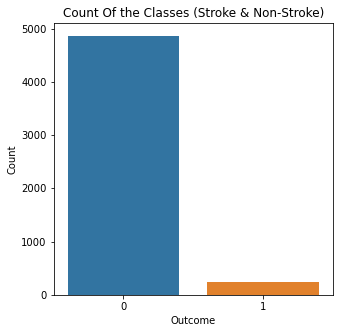

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(strokes_df["stroke"])
plt.title("Count Of the Classes (Stroke & Non-Stroke)")
plt.xlabel("Outcome")
plt.ylabel("Count")

Text(0, 0.5, 'Age')

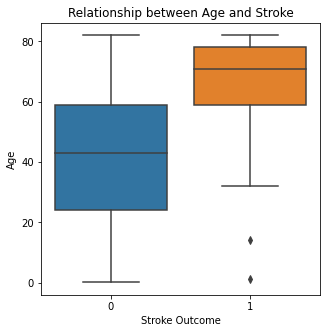

In [13]:
plt.figure(figsize=(5,5))
sns.boxplot(x="stroke", y="age", data=strokes_df)
plt.title("Relationship between Age and Stroke")
plt.xlabel("Stroke Outcome")
plt.ylabel("Age")

Text(0, 0.5, 'Average Glucose Level')

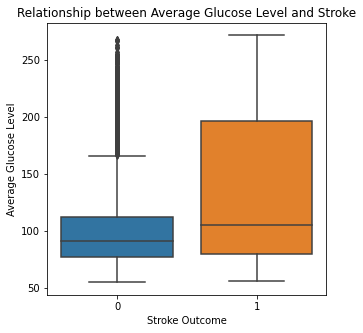

In [14]:
plt.figure(figsize=(5,5))
sns.boxplot(x="stroke", y="avg_glucose_level", data=strokes_df)
plt.title("Relationship between Average Glucose Level and Stroke")
plt.xlabel("Stroke Outcome")
plt.ylabel("Average Glucose Level")

Text(0, 0.5, 'BMI')

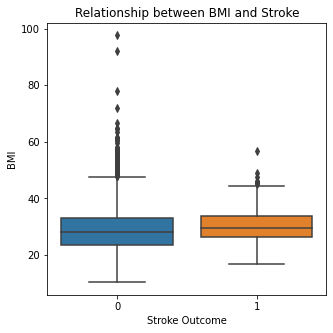

In [15]:
plt.figure(figsize=(5,5))
sns.boxplot(x="stroke", y="bmi", data=strokes_df)
plt.title("Relationship between BMI and Stroke")
plt.xlabel("Stroke Outcome")
plt.ylabel("BMI")

Text(0, 0.5, 'Count')

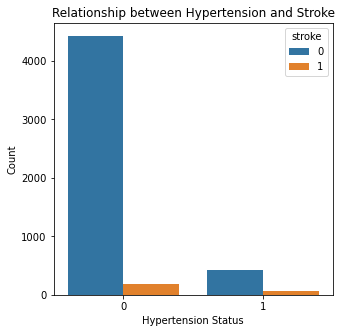

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(x="hypertension", data=strokes_df, hue="stroke")
plt.title("Relationship between Hypertension and Stroke")
plt.xlabel("Hypertension Status")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

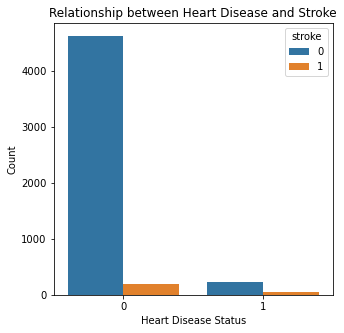

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x="heart_disease", data=strokes_df, hue="stroke")
plt.title("Relationship between Heart Disease and Stroke")
plt.xlabel("Heart Disease Status")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

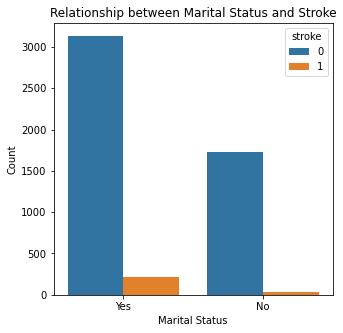

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(x="ever_married", data=strokes_df, hue="stroke")
plt.title("Relationship between Marital Status and Stroke")
plt.xlabel("Marital Status")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

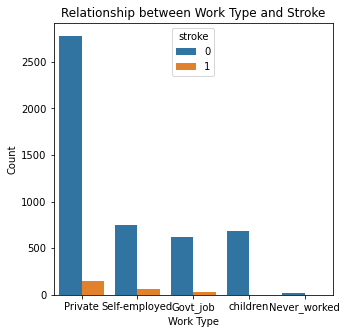

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x="work_type", data=strokes_df, hue="stroke")
plt.title("Relationship between Work Type and Stroke")
plt.xlabel("Work Type")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

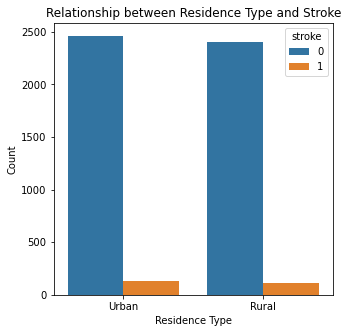

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(x="Residence_type", data=strokes_df, hue="stroke")
plt.title("Relationship between Residence Type and Stroke")
plt.xlabel("Residence Type")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

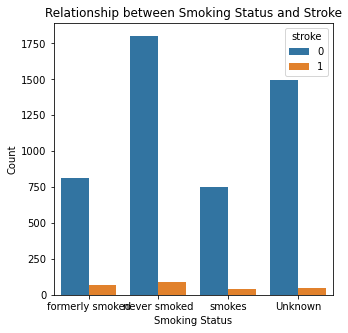

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x="smoking_status", data=strokes_df, hue="stroke")
plt.title("Relationship between Smoking Status and Stroke")
plt.xlabel("Smoking Status")
plt.ylabel("Count")

### Data Pre-Processing

In [22]:
strokes_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [23]:
gender_dummies = pd.get_dummies(strokes_df["gender"])
married_dummies = pd.get_dummies(strokes_df["ever_married"])
work_dummies = pd.get_dummies(strokes_df["work_type"])
residence_dummies = pd.get_dummies(strokes_df["Residence_type"])
smoking_dummies = pd.get_dummies(strokes_df["smoking_status"])

In [24]:
strokes_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [25]:
strokes_df = strokes_df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','stroke']]

In [26]:
df = pd.concat([strokes_df, gender_dummies, married_dummies, work_dummies, residence_dummies, smoking_dummies], axis="columns")

In [27]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'Female', 'Male', 'Other', 'No', 'Yes', 'Govt_job',
       'Never_worked', 'Private', 'Self-employed', 'children', 'Rural',
       'Urban', 'Unknown', 'formerly smoked', 'never smoked', 'smokes'],
      dtype='object')

In [28]:
df = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'Female', 'Male', 'No','Govt_job',
       'Never_worked', 'Private', 'Self-employed', 'Rural', 'formerly smoked', 'never smoked', 'smokes']]

In [29]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,No,Govt_job,Never_worked,Private,Self-employed,Rural,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,0,1,0,0,1,0,0
1,61.0,0,0,202.21,NaN,1,1,0,0,0,0,0,1,1,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,0,1,0,1,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,0,0,1,1,0,1,0


In [30]:
df.isnull().sum()

age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
Female                 0
Male                   0
No                     0
Govt_job               0
Never_worked           0
Private                0
Self-employed          0
Rural                  0
formerly smoked        0
never smoked           0
smokes                 0
dtype: int64

In [31]:
bmiMedianValue = df["bmi"].median() 
print(bmiMedianValue)

28.1


In [32]:
df["bmi"].fillna(bmiMedianValue,inplace=True)

In [33]:
df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
Female               0
Male                 0
No                   0
Govt_job             0
Never_worked         0
Private              0
Self-employed        0
Rural                0
formerly smoked      0
never smoked         0
smokes               0
dtype: int64

In [34]:
df["bmi"].describe()

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

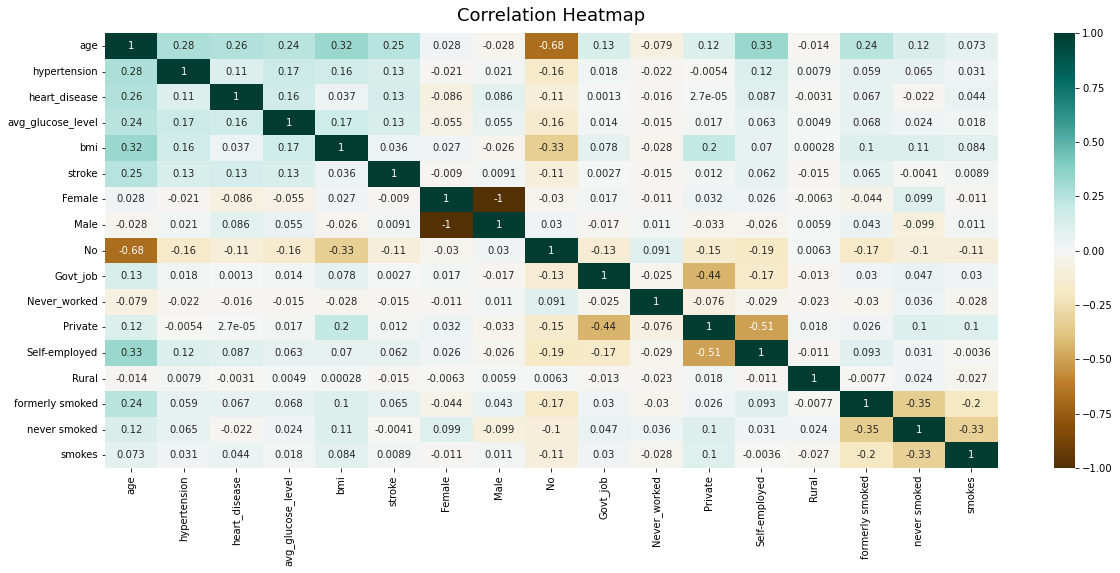

In [35]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

### Feature Selection

In [36]:
from sklearn.feature_selection import SelectKBest, chi2

In [37]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [38]:
bestFeatures = SelectKBest(score_func=chi2, k=10)
fit = bestFeatures.fit(X,y)

In [39]:
scores = pd.DataFrame(fit.scores_)
cols = pd.DataFrame(X.columns)

In [40]:
bestFeaturesDf = pd.concat([cols, scores], axis=1)
bestFeaturesDf.columns = ['Features', 'Score']
print(bestFeaturesDf)

             Features        Score
0                 age  3635.226911
1        hypertension    75.449498
2       heart_disease    87.987436
3   avg_glucose_level  1718.285446
4                 bmi    13.683435
5              Female     0.172411
6                Male     0.248952
7                  No    39.355836
8            Govt_job     0.031905
9        Never_worked     1.126929
10            Private     0.308806
11      Self-employed    16.584252
12              Rural     0.620311
13    formerly smoked    17.607359
14       never smoked     0.054854
15             smokes     0.345288


In [41]:
print(bestFeaturesDf.nlargest(8, "Score"))

             Features        Score
0                 age  3635.226911
3   avg_glucose_level  1718.285446
2       heart_disease    87.987436
1        hypertension    75.449498
7                  No    39.355836
13    formerly smoked    17.607359
11      Self-employed    16.584252
4                 bmi    13.683435


In [42]:
bestOnes = ['age', 'avg_glucose_level', 'bmi', 'heart_disease', 'hypertension', 'No', 'formerly smoked', 'Self-employed']

In [43]:
df[bestOnes].describe()

,age,avg_glucose_level,bmi,heart_disease,hypertension,No,formerly smoked,Self-employed
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.862035,0.054012,0.097456,0.343836,0.173190,0.160274
std,22.612647,45.283560,7.699562,0.226063,0.296607,0.475034,0.378448,0.366896
min,0.080000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,91.885000,28.100000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,114.090000,32.800000,0.000000,0.000000,1.000000,0.000000,0.000000
max,82.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
X = df[bestOnes]
y = df["stroke"]

In [45]:
print(X.shape, y.shape)

(5110, 8) (5110,)


In [46]:
X.head()

,age,avg_glucose_level,bmi,heart_disease,hypertension,No,formerly smoked,Self-employed
0,67.0,228.69,36.6,1,0,0,1,0
1,61.0,202.21,28.1,0,0,0,0,1
2,80.0,105.92,32.5,1,0,0,0,0
3,49.0,171.23,34.4,0,0,0,0,0
4,79.0,174.12,24.0,0,1,0,0,1


### Working on the Imbalanced Data

In [47]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
from imblearn.combine import SMOTETomek 

In [50]:
from collections import Counter

Text(0, 0.5, 'Count')

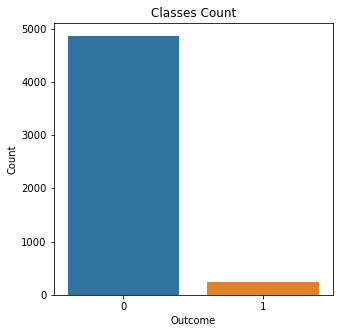

In [51]:
plt.figure(figsize=(5,5))
sns.countplot(strokes_df["stroke"])
plt.title("Classes Count")
plt.xlabel("Outcome")
plt.ylabel("Count")

In [52]:
yes_stroke = df[df["stroke"] == 1]
no_stroke = df[df["stroke"] == 0]

In [53]:
print(yes_stroke.shape, no_stroke.shape)

(249, 17) (4861, 17)


In [54]:
sm = SMOTE(random_state=123)

In [55]:
X_res, y_res = sm.fit_resample(X, y)

In [56]:
print(X_res.shape, y_res.shape)

(9722, 8) (9722,)


In [57]:
#smote = SMOTETomek(random_state=123)

In [58]:
#X_res, y_res = smote.fit_resample(X, y)

In [59]:
#print(X_res.shape, y_res.shape)

In [60]:
print("Original dataset shape {}".format(Counter(y)))
print("Resampled dataset shape {}".format(Counter(y_res)))

Original dataset shape Counter({0: 4861, 1: 249})
Resampled dataset shape Counter({1: 4861, 0: 4861})


In [61]:
y_res.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
scaler = MinMaxScaler()

In [65]:
X_res = scaler.fit_transform(X_res)
X_test = scaler.fit_transform(X_test)

In [66]:
print(X_res.shape, X_test.shape)

(9722, 8) (1533, 8)


### ANN Model

#### 1. Model with Nadam Optimizer

In [67]:
model_1 = tf.keras.models.Sequential()

In [68]:
model_1.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(8,)))

In [69]:
model_1.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [70]:
model_1.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [71]:
model_1.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [72]:
model_1.compile(optimizer = tf.keras.optimizers.Nadam(learning_rate=0.1), 
                loss = 'binary_crossentropy', 
                metrics = ['accuracy'])

In [73]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_1.fit(x= X_res, y= y_res, epochs=150)

Epoch 1/150
304/304 [==============================] - 1s 1ms/step - loss: 0.6811 - accuracy: 0.7207
Epoch 2/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4753 - accuracy: 0.7783
Epoch 3/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.7834
Epoch 4/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.7830
Epoch 5/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.7779
Epoch 6/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4987 - accuracy: 0.7777
Epoch 7/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7810
Epoch 8/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4490 - accuracy: 0.7869
Epoch 9/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.7900
Epoch 10/150
304/304 [==============================] - 1s 2ms/step - loss: 0.4440 - accura

#### 2. Model with Adamax Optimizer

In [75]:
model_2 = tf.keras.models.Sequential()

In [76]:
model_2.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(8,)))

In [77]:
model_2.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [78]:
model_2.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [79]:
model_2.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [80]:
model_2.compile(optimizer = tf.keras.optimizers.Adamax(learning_rate=0.1), 
                loss = 'binary_crossentropy', 
                metrics = ['accuracy'])

In [81]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1152      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [82]:
model_2.fit(x= X_res, y= y_res, epochs=150)

Epoch 1/150
304/304 [==============================] - 1s 1ms/step - loss: 0.4630 - accuracy: 0.7771
Epoch 2/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8098
Epoch 3/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8150
Epoch 4/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8105
Epoch 5/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8154
Epoch 6/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8187
Epoch 7/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8114
Epoch 8/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8211
Epoch 9/150
304/304 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8207
Epoch 10/150
304/304 [==============================] - 0s 1ms/step - loss: 0.3930 - accura

#### 3. Model with Adam Optimizer

In [83]:
model_3 = tf.keras.models.Sequential()

In [84]:
model_3.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(8,)))

In [85]:
model_3.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [86]:
model_3.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [87]:
model_3.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [88]:
model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.1), 
                loss = 'binary_crossentropy', 
                metrics = ['accuracy'])

In [89]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [90]:
model_3.fit(x= X_res, y= y_res, epochs=150)

Epoch 1/150
304/304 [==============================] - 1s 2ms/step - loss: 0.5015 - accuracy: 0.7676
Epoch 2/150
304/304 [==============================] - 1s 2ms/step - loss: 0.4572 - accuracy: 0.7908
Epoch 3/150
304/304 [==============================] - 1s 2ms/step - loss: 0.4324 - accuracy: 0.8039
Epoch 4/150
304/304 [==============================] - 1s 2ms/step - loss: 0.4477 - accuracy: 0.7954
Epoch 5/150
304/304 [==============================] - 1s 2ms/step - loss: 0.4348 - accuracy: 0.8035
Epoch 6/150
304/304 [==============================] - 1s 2ms/step - loss: 0.4297 - accuracy: 0.8026
Epoch 7/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.8038
Epoch 8/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8033
Epoch 9/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.7992
Epoch 10/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4266 - accura

#### 4. Model with SGD Optimizer

In [91]:
model_4 = tf.keras.models.Sequential()

In [92]:
model_4.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(8,)))

In [93]:
model_4.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [94]:
model_4.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [95]:
model_4.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [96]:
model_4.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), 
                loss = 'binary_crossentropy', 
                metrics = ['accuracy'])

In [97]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1152      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [98]:
model_4.fit(x= X_res, y= y_res, epochs=150)

Epoch 1/150
304/304 [==============================] - 1s 1ms/step - loss: 0.4716 - accuracy: 0.7717
Epoch 2/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8098
Epoch 3/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8105
Epoch 4/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8121
Epoch 5/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8185
Epoch 6/150
304/304 [==============================] - 0s 997us/step - loss: 0.4059 - accuracy: 0.8175
Epoch 7/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8138
Epoch 8/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8154
Epoch 9/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8199
Epoch 10/150
304/304 [==============================] - 0s 994us/step - loss: 0.4001 - ac

#### 5. Model with RMSprop Optimizer

In [99]:
model_5 = tf.keras.models.Sequential()

In [100]:
model_5.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(8,)))

In [101]:
model_5.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [102]:
model_5.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [103]:
model_5.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [104]:
model_5.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1), 
                loss = 'binary_crossentropy', 
                metrics = ['accuracy'])

In [105]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1152      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [106]:
model_5.fit(x= X_res, y= y_res, epochs=150)

Epoch 1/150
304/304 [==============================] - 1s 1ms/step - loss: 0.7063 - accuracy: 0.7454
Epoch 2/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.7867
Epoch 3/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.7988
Epoch 4/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.7900
Epoch 5/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.7957
Epoch 6/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.7983
Epoch 7/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.8001
Epoch 8/150
304/304 [==============================] - 1s 2ms/step - loss: 0.4456 - accuracy: 0.8026
Epoch 9/150
304/304 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.8072
Epoch 10/150
304/304 [==============================] - 0s 2ms/step - loss: 0.4354 - accura

### Evaluating the models

In [107]:
print("Evaluate on test data - Nadam Optimizer")
test_loss, test_acc = model_1.evaluate(X_test, y_test)
print("Test Loss: ", test_loss, "\n")
print("Test Accuracy: ", test_acc)

Evaluate on test data - Nadam Optimizer
48/48 [==============================] - 0s 808us/step - loss: 0.4742 - accuracy: 0.7378
Test Loss:  0.47423994541168213 

Test Accuracy:  0.7377690672874451


In [108]:
print("Evaluate on test data - Adamax Optimizer")
test_loss_2, test_acc_2 = model_2.evaluate(X_test, y_test)
print("Test Loss: ", test_loss_2, "\n")
print("Test Accuracy: ", test_acc_2)

Evaluate on test data - Adamax Optimizer
48/48 [==============================] - 0s 922us/step - loss: 0.4202 - accuracy: 0.7854
Test Loss:  0.4201503396034241 

Test Accuracy:  0.7853881120681763


In [109]:
print("Evaluate on test data - Adam Optimizer")
test_loss_3, test_acc_3 = model_3.evaluate(X_test, y_test)
print("Test Loss: ", test_loss_3, "\n")
print("Test Accuracy: ", test_acc_3)

Evaluate on test data - Adam Optimizer
48/48 [==============================] - 0s 717us/step - loss: 0.5518 - accuracy: 0.7215
Test Loss:  0.5517846345901489 

Test Accuracy:  0.7214611768722534


In [110]:
print("Evaluate on test data - SGD Optimizer")
test_loss_4, test_acc_4 = model_4.evaluate(X_test, y_test)
print("Test Loss: ", test_loss_4, "\n")
print("Test Accuracy: ", test_acc_4)

Evaluate on test data - SGD Optimizer
48/48 [==============================] - 0s 995us/step - loss: 0.3531 - accuracy: 0.8474
Test Loss:  0.3530927896499634 

Test Accuracy:  0.8473581075668335


In [111]:
print("Evaluate on test data - RMSprop Optimizer")
test_loss_5, test_acc_5 = model_5.evaluate(X_test, y_test)
print("Test Loss: ", test_loss_5, "\n")
print("Test Accuracy: ", test_acc_5)

Evaluate on test data - RMSprop Optimizer
48/48 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.7339
Test Loss:  0.3693225681781769 

Test Accuracy:  0.7338551878929138


In [112]:
y_pred = []

In [113]:
yp = model_4.predict(X_test)
yp[:10]

array([[1.3947129e-02],
       [1.0492840e-04],
       [2.9559970e-02],
       [1.3224244e-01],
       [6.4268607e-01],
       [2.4557710e-02],
       [5.4501116e-02],
       [1.6113189e-01],
       [5.4812431e-04],
       [3.3172965e-04]], dtype=float32)

In [114]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [115]:
y_pred[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [116]:
y_test[:10]

4688    0
4478    0
3849    0
4355    0
3826    0
3951    0
3396    0
465     0
410     0
1632    0
Name: stroke, dtype: int64

In [117]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      1444
           1       0.19      0.52      0.28        89

    accuracy                           0.85      1533
   macro avg       0.58      0.69      0.60      1533
weighted avg       0.92      0.85      0.88      1533



### Saving the best model

In [118]:
Keras_file = "Strokes_Predictor.h5"

In [119]:
tf.keras.models.save_model(model_4, Keras_file)

In [120]:
model = tf.keras.models.load_model('Strokes_Predictor.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\nehak\AppData\Local\Temp\tmpw79ud21a\assets


48320

In [121]:
x= ['age','avg_glucose_level','heart_disease','hypertension','No','formerly smoked','Self-employed','bmi']
data = [34,130,0,1,1,0,1,59]
paitentid_HM = pd.DataFrame([data],columns = x)
paitentid_HM.head()

,age,avg_glucose_level,heart_disease,hypertension,No,formerly smoked,Self-employed,bmi
0,34,130,0,1,1,0,1,59


In [122]:
predictions_diabetes = model_4.predict(paitentid_HM)
print(predictions_diabetes)

[[0.]]
